### Exploring the Enron Data
####Author: Stas Sajin

The chief aim of this report is to perform some exploratory analyses on the Enron email data that would help in the identification of persons of interest. This report will outline all the work I do. For communication of findings, see the document titled Enron Report.

In [194]:
#Load up the libraries 
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
#load up the data, then transform it into a dataframe using pandas
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
df = pd.DataFrame.from_dict(data_dict, orient='index')

In [196]:
# statistics about the data set
print 'Number of persons:', df['poi'].count()
print 'Number of POIs:', df.loc[df.poi == True, 'poi'].count()
print 'Number of features:', df.shape[1]
print 'Proportion POI:', \
    float(df.loc[df.poi == True, 'poi'].count()) / df['poi'].count()


Number of persons: 146
Number of POIs: 18
Number of features: 21
Proportion POI: 0.123287671233


Observations:
We have several rows that are an issue:

* The row with the name TOTAL does not represent a person of interest and should be removed
* THE TRAVEL AGENCY IN THE PARK is also not the name of a person and should be removed
* We seem to have a lot of missing values (I will explore the pattern of missingness later). 
* A student in the [forums](https://discussions.udacity.com/t/two-records-financial-values-out-of-sync/8687) pointed out that there are two records that are out of sync: BELFER ROBERT and BHATNAGAR SANJAY, so the values for these records will be corrected below. 

In [197]:
#drop TOTAL and THE TRAVEL AGENCY IN THE PARK
df = df.drop(['TOTAL', 'THE TRAVEL AGENCY IN THE PARK'])

#Correct the values for BELFER ROBERT and BHATNAGAR SANJAY using the numbers from enron61702insiderpay.pdf
#BELFER ROBERT
df.set_value('BELFER ROBERT', 'salary', 'NaN')
df.set_value('BELFER ROBERT', 'bonus', 'NaN')
df.set_value('BELFER ROBERT', 'total_payments', 3285)
df.set_value('BELFER ROBERT', 'exercised_stock_options', 'NaN')
df.set_value('BELFER ROBERT', 'restricted_stock', 44093)
df.set_value('BELFER ROBERT', 'restricted_stock_deferred', -44093)
df.set_value('BELFER ROBERT', 'total_stock_value', 'NaN')
df.set_value('BELFER ROBERT', 'other', 'NaN')
df.set_value('BELFER ROBERT', 'director_fees', 102500)
df.set_value('BELFER ROBERT', 'deferred_income', -102500)
df.set_value('BELFER ROBERT', 'long_term_incentive', 'NaN')

#BHATNAGAR SANJAY
df.set_value('BHATNAGAR SANJAY', 'salary', 'NaN')
df.set_value('BHATNAGAR SANJAY', 'bonus', 'NaN')
df.set_value('BHATNAGAR SANJAY', 'total_payments', 137864)
df.set_value('BHATNAGAR SANJAY', 'exercised_stock_options', 15456290)
df.set_value('BHATNAGAR SANJAY', 'restricted_stock', 2604490)
df.set_value('BHATNAGAR SANJAY', 'restricted_stock_deferred', -2604490)
df.set_value('BHATNAGAR SANJAY', 'total_stock_value', 15456290)
df.set_value('BHATNAGAR SANJAY', 'other', 'NaN')
df.set_value('BHATNAGAR SANJAY', 'director_fees', 'NaN')
df.set_value('BHATNAGAR SANJAY', 'deferred_income',  'NaN')
df.set_value('BHATNAGAR SANJAY', 'long_term_incentive', 'NaN')
df.set_value('BHATNAGAR SANJAY', 'expenses', 137864)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818,NaN,684694,860136,1599641,NaN,NaN,NaN,NaN,1599641,...,NaN,NaN,874,NaN,False,NaN,NaN,93750,NaN,NaN
BECK SALLY W,231330,7315,NaN,969068,NaN,700000,126027,2639,NaN,126027,...,NaN,4343,566,386,False,NaN,NaN,NaN,sally.beck@enron.com,144
BELDEN TIMOTHY N,213999,7991,2144013,5501630,953136,5249999,157569,5521,NaN,1110705,...,NaN,484,210698,108,True,NaN,-2334434,NaN,tim.belden@enron.com,228
BELFER ROBERT,NaN,NaN,-102500,3285,NaN,NaN,44093,NaN,-44093,NaN,...,NaN,NaN,NaN,NaN,False,102500,-102500,NaN,NaN,NaN
BERBERIAN DAVID,216582,NaN,NaN,228474,1624396,NaN,869220,NaN,NaN,2493616,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [198]:
#first, fill out the missing values in financial features with 0
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                      'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                      'exercised_stock_options', 'other', 
                      'long_term_incentive', 'restricted_stock', 'director_fees']


#Next, I want to find out the proportion of missing values for each person in the dataset
df = df.replace('NaN', np.nan)
missingName=df.isnull().sum(axis=1)/21
missingName.sort_values()

#find the proportion of financial features that are missing
missingFinancial=df[financial_features].isnull().sum(axis=1)/14
missingFinancial.sort_values()

ALLEN PHILLIP K            0.142857
LAY KENNETH L              0.142857
DETMERING TIMOTHY J        0.142857
FREVERT MARK A             0.142857
REYNOLDS LAWRENCE          0.142857
HAEDICKE MARK E            0.142857
DERRICK JR. JAMES V        0.214286
PIPER GREGORY F            0.214286
BAXTER JOHN C              0.214286
OLSON CINDY K              0.285714
HERMANN ROBERT J           0.285714
RICE KENNETH D             0.285714
RIEKER PAULA H             0.285714
GAHN ROBERT S              0.285714
SHARP VICTORIA T           0.285714
MULLER MARK S              0.285714
HANNON KEVIN P             0.285714
BUY RICHARD B              0.285714
LINDHOLM TOD A             0.285714
WASAFF GEORGE              0.285714
BAY FRANKLIN R             0.285714
BELDEN TIMOTHY N           0.285714
BUCHANAN HAROLD G          0.357143
BLACHMAN JEREMY M          0.357143
SHANKMAN JEFFREY A         0.357143
BIBI PHILIPPE A            0.357143
BUTTS ROBERT H             0.357143
TILNEY ELIZABETH A         0

Observations: it seems like some people in the dataset have a lot of missing values. There might be a relationship between the pattern of missingness and whether or not a person is a POI, so I will create a new feature that will indicate the proportion of missing data for each person.

In [199]:
#combine missingname with the original dataframe
df['missingProportion']= missingName.astype(float)
df['missingFinancial']= missingFinancial.astype(float)
#list(df.columns.values)

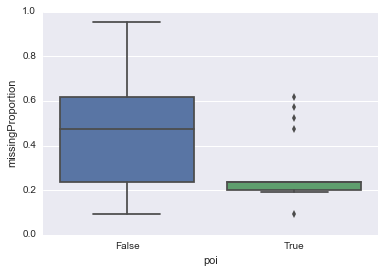

In [200]:
#plot the pattern of missing data by breaking it down based on poi.
sns.boxplot(df['poi'], df['missingProportion'])

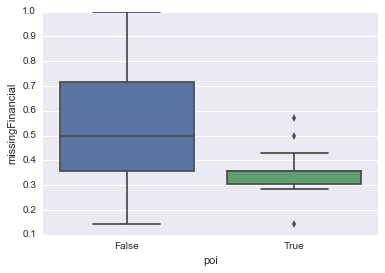

In [201]:
#plot the pattern of missing financials by breaking it down based on poi.
sns.boxplot(df['poi'], df['missingFinancial'])

In [202]:
#show some stats
df.groupby(['poi'])['missingProportion'].describe()

poi         
False  count    126.000000
       mean       0.462963
       std        0.216309
       min        0.095238
       25%        0.238095
       50%        0.476190
       75%        0.619048
       max        0.952381
True   count     18.000000
       mean       0.288360
       std        0.149225
       min        0.095238
       25%        0.202381
       50%        0.238095
       75%        0.238095
       max        0.619048
dtype: float64

Observations: it seems like there is more information available for a POI. This makes sense when one considers the fact that people with larger involvement in the organization, are also likely to have multiple sources of compensation, which leads to a more complete set of financial features and a lar ger number of features overall. 

In [203]:
#in this code I will examine the pattern of missing data for each column
missingColumn=df.isnull().sum()
missingColumn

salary                        50
to_messages                   58
deferral_payments            106
total_payments                21
exercised_stock_options       44
bonus                         63
restricted_stock              34
shared_receipt_with_poi       58
restricted_stock_deferred    127
total_stock_value             19
expenses                      49
loan_advances                141
from_messages                 58
other                         54
from_this_person_to_poi       58
poi                            0
director_fees                129
deferred_income               95
long_term_incentive           79
email_address                 33
from_poi_to_this_person       58
missingProportion              0
missingFinancial               0
dtype: int64

Observations: Although it seems like we have a lot of missing data, it is important to remember that most of the NaN values are not exactly missing values but rather zeros, especially for financial data. Later, I will change some of the data to account for that. One thing I noticed is that some people have their email address listed and some don't have it. I will create a new feature email_present that can take the value of 1 or 0, depending on whether we have the email address for that person in our dataframe

In [204]:
df.loc[df['email_address'].isnull(), 'email_present'] = 0
df.loc[df['email_address'].notnull(), 'email_present'] = 1

poi         
False  count    126.000000
       mean       0.738095
       std        0.441426
       min        0.000000
       25%        0.000000
       50%        1.000000
       75%        1.000000
       max        1.000000
True   count     18.000000
       mean       1.000000
       std        0.000000
       min        1.000000
       25%        1.000000
       50%        1.000000
       75%        1.000000
       max        1.000000
dtype: float64

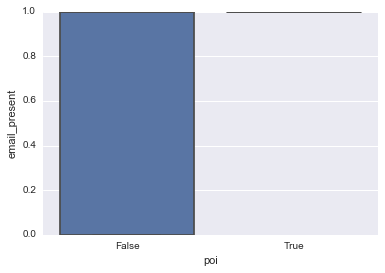

In [205]:
#plot the pattern of missing data by breaking it down based on poi.
sns.boxplot(df['poi'], df['email_present'])
df.groupby(['poi'])['email_present'].describe()

Observations: This is a really useful feature. One thing we found out is that all POI have their email address present.

So far we have created two new features: 1) the proportion of missing data, which does not seem to be random. 2) the presence of the email_address. In the next section, I will see if I can come up additional features.

In [206]:
#first, fill out the missing values in financial features with 0
financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                      'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                      'exercised_stock_options', 'other', 
                      'long_term_incentive', 'restricted_stock', 'director_fees']

df[financial_features] = df[financial_features].fillna(0)


In [207]:
#next, I want to examine how can I replace the missing values for email features.  

email_features = ['poi','to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

df[email_features].groupby(['poi']).describe()

from_messages  from_poi_to_this_person  from_this_person_to_poi  \
poi                                                                            
False count      72.000000                72.000000                72.000000   
      mean      668.763889                58.500000                36.277778   
      std      1978.997801                87.995198                85.139690   
      min        12.000000                 0.000000                 0.000000   
      25%        20.500000                10.000000                 0.000000   
      50%        41.000000                26.500000                 6.000000   
      75%       216.500000                61.750000                23.250000   
      max     14368.000000               528.000000               411.000000   
True  count      14.000000                14.000000                14.000000   
      mean      300.357143                97.785714                66.714286   
      std       805.844574                76.058862               158.289622   
      min        16.000000                13.000000                 4.000000   
      25%        33.000000                44.500000                12.500000   
      50%        44.500000                62.000000                15.500000   
      75%       101.500000               135.750000                28.750000   
      max      3069.000000               240.000000               609.000000   

             shared_receipt_with_poi   to_messages  
poi                                                 
False count                72.000000     72.000000  
      mean               1058.527778   2007.111111  
      std                1132.503757   2693.165955  
      min                   2.000000     57.000000  
      25%                 191.500000    513.750000  
      50%                 594.000000    944.000000  
      75%                1635.500000   2590.750000  
      max                4527.000000  15149.000000  
True  count                14.000000     14.000000  
      mean               1783.000000   2417.142857  
      std                1264.996625   1961.858101  
      min                  91.000000    225.000000  
      25%                1059.250000   1115.750000  
      50%                1589.000000   1875.000000  
      75%                2165.250000   2969.250000  
      max                5521.000000   7991.000000

It seems like median imputation would be the best approach because all of these features the median for POI True is higher than the median POI False

In [208]:
#input for median for email features
email_features = ['to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
#df.loc[df[email_features] and df['poi'] == True].isnull() #= df[df['poi'] == True].fillna(df[email_features].median())
poiTrue=df[df['poi'] == True].fillna(df[df['poi'] == True][email_features].median())
poiFalse=df[df['poi'] == False].fillna(df[df['poi'] == False][email_features].median())

df1=pd.concat([poiTrue, poiFalse])


Ok, so we dealt with missing values; Let us create some more features. 

If an insider has some knowledge that the company is not doing well and is over-inflating its financials, then the insider will likely want to exercise their stock options as soon as possible. Hence, the majority of their compensation will come from excercized stock options. I will create the following features:

* The ratio (total_payments+exercised stock options)/total compensation; I expect this ratio to be higher for POI True
* The ratio between salary and total compensation; I expect this ratio to be lower for POI True

poi         
False  count    126.000000
       mean       0.407921
       std        0.374808
       min        0.000000
       25%        0.000000
       50%        0.333250
       75%        0.767891
       max        1.000000
True   count     18.000000
       mean       0.381539
       std        0.384384
       min        0.000000
       25%        0.000000
       50%        0.273203
       75%        0.666377
       max        0.997048
dtype: float64

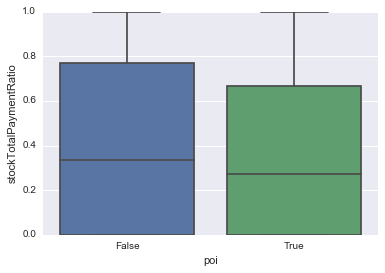

In [209]:
#create ratio between exercised_stock_options and total_compensation
df1['stockTotalPaymentRatio'] = df1['exercised_stock_options']/(df1['total_payments']+df1['exercised_stock_options'])

#there are some inf values because some individuals did not have any compensation except for their stock options. It is very 
#likely that these individuals are not as involved inside the organization, so I will replace the inf values with 0. 
df1=df1.replace([np.inf], np.nan)
df1.loc[df1['stockTotalPaymentRatio'].isnull()] = 0


##plot the this ratio by breaking it down based on poi
sns.boxplot(df1['poi'], df1['stockTotalPaymentRatio'])
df1.groupby(['poi'])['stockTotalPaymentRatio'].describe()

This feature might not prove as useful since the median fdor the two groups are close to each other.

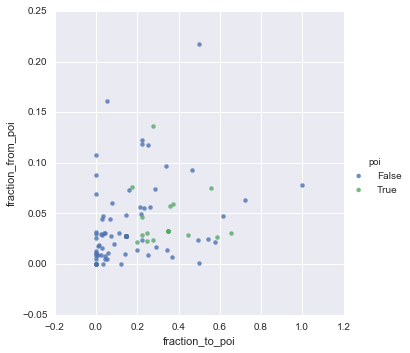

In [210]:
#create some email features; these are features that have been discussed in class lectures that examine the fraction of emails 
#to the poi and the fraction of emails from poi. The feature creation here relies on the assumption that insiders hang out together#
#and email each other more often
df1['fraction_to_poi']=df1['from_this_person_to_poi']/df1['from_messages']
df1['fraction_from_poi']=df1['from_poi_to_this_person']/df1['to_messages']

#plot this feature
sns.lmplot(x="fraction_to_poi", y="fraction_from_poi", hue="poi", fit_reg=False, data=df1)

In [211]:
#the POI should take a value of 0 or 1
df1['poi'] = df['poi'].astype(int)

# There were some NA's introduced in the previous part, so I replace them with 0s
df1 = df1.fillna(0)

## Examining outliers


In [255]:
#extract the features with POI email identifiers
features_withPoiEmail = df1.drop(['poi', 'email_address'], axis=1)
#have the features and labels separated
features_noPoiEmail = df1.drop(['poi', 'email_address','fraction_to_poi','fraction_to_poi','from_this_person_to_poi',
                    'from_poi_to_this_person','fraction_from_poi','shared_receipt_with_poi','to_messages',
                    'from_messages','email_present','missingProportion'], axis=1)
labels = df1.poi

##I'm not using the email features that involve to and from POI because this leads to data leakage. 
list(features_noPoiEmail.columns.values)
#list(features_withPoiEmail.columns.values)

['salary',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'loan_advances',
 'other',
 'director_fees',
 'deferred_income',
 'long_term_incentive',
 'missingFinancial',
 'stockTotalPaymentRatio']

In [215]:
#First thing I will do is try a variety of models with their default setting, so that I can see if a particular 
#model stands out from the rest
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut
import time

classifiers = [
    ExtraTreesClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    ExtraTreeClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    KNeighborsClassifier()
]

for classifier in classifiers:
    print classifier
    clf_emails=classifier.fit(features_withPoiEmail, labels)
    clf_noEmails=classifier.fit(features_noPoiEmail, labels)
    cv = StratifiedShuffleSplit(labels,100, random_state=42)
    
    print "Model with POI emails features"
    print 'precision', cross_val_score(clf_emails, features_withPoiEmail, labels, scoring='precision', cv=cv).mean()
    print 'recall', cross_val_score(clf_emails, features_withPoiEmail, labels, scoring='recall', cv=cv).mean()
    print 'F1', cross_val_score(clf_emails, features_withPoiEmail, labels, scoring='f1', cv=cv).mean()
    print "  ->Model Run Time:", time.time() - start
    print " "
    start = time.time()
    print "Model without POI Emails features"
    print 'precision', cross_val_score(clf_noEmails, features_noPoiEmail, labels, scoring='precision', cv=cv).mean()
    print 'recall', cross_val_score(clf_noEmails, features_noPoiEmail, labels, scoring='recall', cv=cv).mean()
    print 'F1', cross_val_score(clf_noEmails, features_noPoiEmail, labels, scoring='f1', cv=cv).mean()
    print "  ->Model Run Time:", time.time() - start
    print " "



 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Model with POI emails features
precision 0.465
recall 0.32
F1 0.364
  ->Model Run Time: 11.1760001183
 
Model without POI Emails features
precision 0.308333333333
recall 0.21
F1 0.239333333333
  ->Model Run Time: 12.0749998093
 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Model with POI emails features
precision 0.501666666667
recall 0.36
F1 0.403333333333
  -

Observations: There seem to be a couple of models that are not performing great, so they will be removed from further exploration. The under-performing models are ExtraTreesClassifier, RandomForestClassifier, KNeighborsClassifier. 



An interesting thing to note is that GausianNB shows the same performance for the feature set that inlcudes the poi_email features as the feature set that excludes the poi_features. Below, I will explore the following models:ExtraTreeClassifier, GaussianNB, DecisionTreeClassifier, AdaBoostClassifier.

## Ada Boost Tunning

In [256]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### StratifiedShuffleSplits for 1000 internal cross-validation splits
### within the grid-search.
sss = StratifiedShuffleSplit(labels, n_iter=20, random_state=42)

param_grid = {
               'model__n_estimators':[25, 50, 100, 200, 400],
               'model__learning_rate':[.5, 1, 1.5],
               'model__algorithm':['SAMME', 'SAMME.R'],
               'model__random_state':[42],
    
             }
# Decision Tree classifier
clf = AdaBoostClassifier()

# Pipeline object. I have used all the steps, it's up to you if you want to use all or just use algorithm tuning.
pipe = Pipeline(steps=[('minmaxer', MinMaxScaler()),
                       #('select', SelectKBest(score_func=f_classif)), 
                          ('model', clf)
                          ])
dt_search = GridSearchCV(pipe, param_grid=param_grid, cv=sss,
                             scoring = 'f1', n_jobs=3)
dt_search.fit(features_noPoiEmail, labels)

### Score of best_estimator on the left out data
print "best score is {0}".format(dt_search.best_score_)

# Print the optimized parameters used in the model selected from grid search
print "Params: ", dt_search.best_params_ 

### Assign the best estimator to final SVM classifier
dt_clf = dt_search.best_estimator_


best score is 0.413333333333
Params:  {'model__algorithm': 'SAMME.R', 'model__learning_rate': 1.5, 'model__random_state': 42, 'model__n_estimators': 50}


In [257]:
cv = StratifiedShuffleSplit(labels, n_iter=1000, random_state=42)
print 'precision', cross_val_score(dt_clf, features_noPoiEmail, labels, scoring='precision', cv=cv).mean()
print 'recall', cross_val_score(dt_clf, features_noPoiEmail, labels, scoring='recall', cv=cv).mean()
print 'F1', cross_val_score(dt_clf, features_noPoiEmail, labels, scoring='f1', cv=cv).mean()



precision 0.364083333333
recall 0.3095
F1 0.315457142857


In [259]:
dt_clf

Pipeline(steps=[('minmaxer', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.5, n_estimators=50, random_state=42))])

In [258]:
importance = zip(features_noPoiEmail[:], dt_clf.named_steps['model'].feature_importances_)
importance = sorted(importance, key = lambda k: k[1], reverse = True)
print pd.DataFrame(importance, columns = ["feature", "importance"])


                      feature  importance
0                       other        0.24
1                      salary        0.18
2     exercised_stock_options        0.12
3                    expenses        0.12
4           total_stock_value        0.10
5              total_payments        0.06
6            restricted_stock        0.06
7      stockTotalPaymentRatio        0.06
8           deferral_payments        0.02
9                       bonus        0.02
10            deferred_income        0.02
11  restricted_stock_deferred        0.00
12              loan_advances        0.00
13              director_fees        0.00
14        long_term_incentive        0.00
15           missingFinancial        0.00
